## 1. Bitcoin. Cryptocurrencies. So hot right now.
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, the 6th of December of 2017 Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup>- <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p>That said, let's get to business. As a first task, we will load the current data from the <a href="https://api.coinmarketcap.com">coinmarketcap API</a> and display it in the output.</p>

In [1]:
# Importing pandas as pd
import pandas as pd

# importing numpy as np
import numpy as np
#import requests
import requests

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = requests.get('https://api.coinmarketcap.com/v1/ticker/').json()


# Printing out the first few lines
# ... YOUR CODE FOR TASK 1 ...
print(current[:10])
x = pd.DataFrame(current)
x.head()

[{'id': 'bitcoin', 'name': 'Bitcoin', 'symbol': 'BTC', 'rank': '1', 'price_usd': '8958.19', 'price_btc': '1.0', '24h_volume_usd': '6730160000.0', 'market_cap_usd': '151543792136', 'available_supply': '16916787.0', 'total_supply': '16916787.0', 'max_supply': '21000000.0', 'percent_change_1h': '-1.5', 'percent_change_24h': '-8.91', 'percent_change_7d': '-19.17', 'last_updated': '1520945966'}, {'id': 'ethereum', 'name': 'Ethereum', 'symbol': 'ETH', 'rank': '2', 'price_usd': '686.429', 'price_btc': '0.0772856', '24h_volume_usd': '1732430000.0', 'market_cap_usd': '67380905453.0', 'available_supply': '98161508.0', 'total_supply': '98161508.0', 'max_supply': None, 'percent_change_1h': '-1.16', 'percent_change_24h': '-6.58', 'percent_change_7d': '-17.88', 'last_updated': '1520945952'}, {'id': 'ripple', 'name': 'Ripple', 'symbol': 'XRP', 'rank': '3', 'price_usd': '0.778471', 'price_btc': '0.00008765', '24h_volume_usd': '344327000.0', 'market_cap_usd': '30431954629.0', 'available_supply': '39091

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,6730160000.0,16916787.0,bitcoin,1520945966,151543792136,21000000.0,Bitcoin,-1.5,-8.91,-19.17,1.0,8958.19,1,BTC,16916787.0
1,1732430000.0,98161508.0,ethereum,1520945952,67380905453.0,None,Ethereum,-1.16,-6.58,-17.88,0.0772856,686.429,2,ETH,98161508.0
2,344327000.0,39091956706.0,ripple,1520945941,30431954629.0,100000000000,Ripple,-0.65,-6.28,-18.03,0.00008765,0.778471,3,XRP,99992520283.0
3,439455000.0,17015288.0,bitcoin-cash,1520945951,17089644306.0,21000000.0,Bitcoin Cash,-0.95,-10.32,-17.94,0.113082,1004.37,4,BCH,17015288.0
4,527971000.0,55609731.0,litecoin,1520945941,9579165453.0,84000000.0,Litecoin,-1.02,-9.4,-15.23,0.0193945,172.257,5,LTC,55609731.0


## 2. Full dataset, filtering, and reproducibility
<p>The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV we conveniently saved on the 6th of December of 2017 using the API call <code>https://api.coinmarketcap.com/v1/ticker/?limit=0</code> named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [2]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...
print(market_cap_raw.count())
market_cap_raw.head()

id                1326
market_cap_usd    1031
dtype: int64


,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


## 3. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [3]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## 4. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

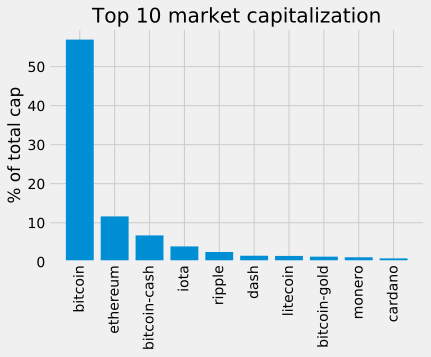

In [4]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10)
cap10 = cap10.set_index('id')
index = np.arange(10)
label = list(cap10.index)

# Calculating market_cap_perc
cap10['market_cap_perc'] = cap10.market_cap_usd / sum(cap.market_cap_usd) * 100


# Plotting the barplot with the title defined above 
ax = plt.bar(index, cap10['market_cap_perc'])
plt.xticks(index, label, rotation=90)



# Annotating the y axis with the label defined above
plt.ylabel(TOP_CAP_YLABEL)
plt.title(TOP_CAP_TITLE)
plt.show()

## 5. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

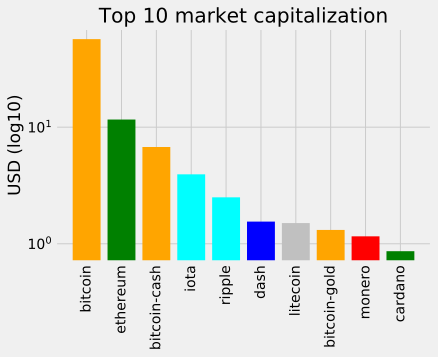

id
bitcoin         56.918669
ethereum        11.629410
bitcoin-cash     6.758088
iota             3.941238
ripple           2.502063
dash             1.547956
litecoin         1.505323
bitcoin-gold     1.314454
monero           1.157262
cardano          0.863312
Name: market_cap_perc, dtype: float64


In [5]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  


ax = plt.bar(index, cap10['market_cap_perc'], log=True, color = COLORS)
plt.xticks(index, label, rotation=90)

# Annotating the y axis with 'USD'
# ... YOUR CODE FOR TASK 5 ...
plt.ylabel('USD')
plt.xticks(index, label, rotation=90)
plt.yticks()


# Final touch! Removing the xlabel as it is not very informative
# ... YOUR CODE FOR TASK 5 ...
plt.ylabel('USD (log10)')
plt.title(TOP_CAP_TITLE)
plt.show()
print(cap10['market_cap_perc'])

## 6. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [9]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id' , 'percent_change_24h' , 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
volatility.tail(10)



,id,percent_change_24h,percent_change_7d
531,britcoin,223.31,272.18
890,coexistcoin,230.87,142.78
735,coimatic-2,244.26,132.24
635,comet,252.07,560.46
303,asiacoin,267.20,521.47
630,eaglecoin,272.50,114.73
697,beatcoin,295.49,132.79
149,bitzeny,416.04,3360.71
832,cashcoin,457.86,374.30
134,fedoracoin,833.01,92.10


## 7. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

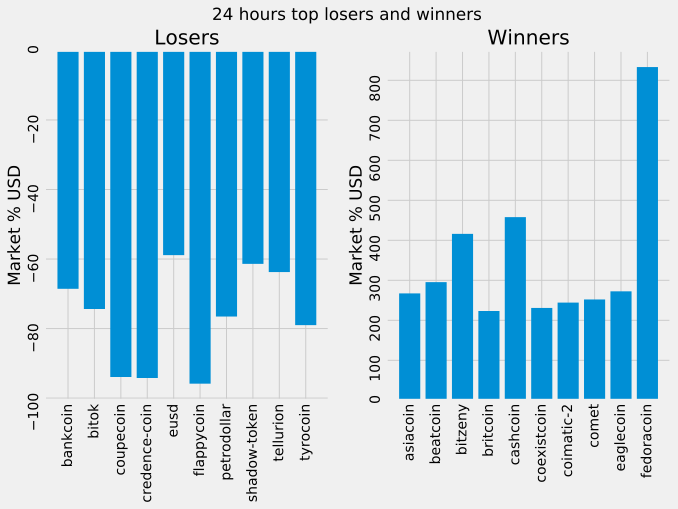

In [7]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    axes[0].bar(volatility_series.id.head(10), volatility_series.percent_change_24h.head(10))
    axes[0].tick_params(rotation = 90)
    axes[0].set_title('Losers')
    axes[0].set_ylabel('Market % USD')
    
    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    # Same as above, but for the top 10 winners
    axes[1].bar(volatility_series.id.tail(10), volatility_series.percent_change_24h.tail(10))
    axes[1].tick_params(rotation = 90)
    axes[1].set_title('Winners')
    axes[1].set_ylabel('Market % USD')
    
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE 
volatile_series = volatility[['id' , 'percent_change_24h']]
fig, ax = top10_subplot(volatile_series,DTITLE)


## 8. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

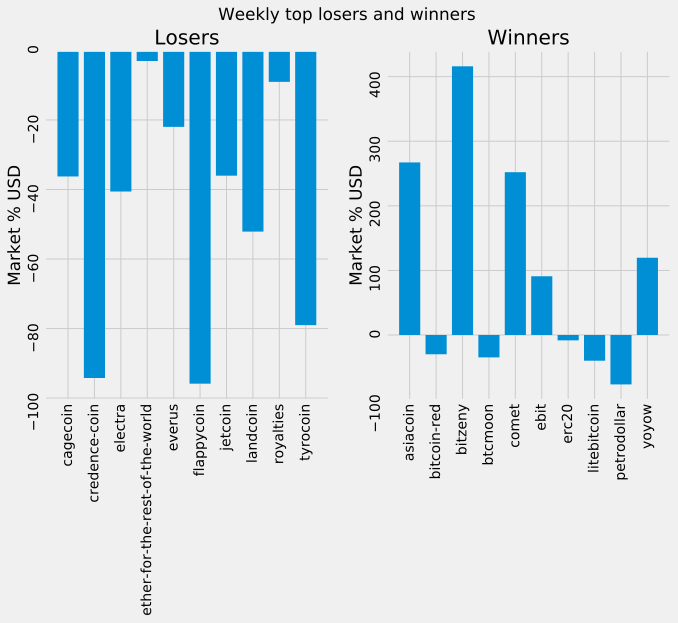

In [13]:
# Sorting in ascending order
volatility =  volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
volatile_series = volatility[['id' , 'percent_change_24h']]
fig, ax = top10_subplot(volatile_series,WTITLE)

## 9. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [28]:
# Selecting everything bigger than 10 billion 
bigger = cap.market_cap_usd
largecaps = bigger[bigger >10000000000]

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps


0    2.130493e+11
1    4.352945e+10
2    2.529585e+10
3    1.475225e+10
Name: market_cap_usd, dtype: float64

## 10. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

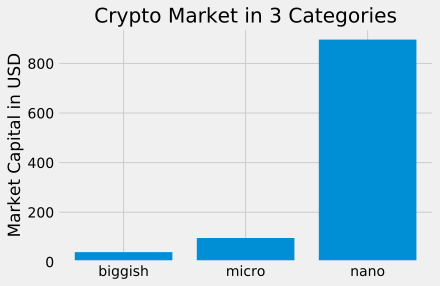

In [30]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd >= 300000000')

# Same as above for micro ...

micro = capcount('market_cap_usd < 300000000 & market_cap_usd >= 50000000')

# ... and for nano
nano =  capcount('market_cap_usd <= 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
# plt.bar(LABELS, values)

plt.bar(LABELS, values)
plt.title('Crypto Market in 3 Categories')
plt.ylabel('Market Capital in USD')
plt.show()